In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("D:\Sreenath\DSWorkspace\police.csv")
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [5]:
# convert stopdata and stop time columns from object to data & time
df['stop_time'] = pd.to_datetime(df.stop_time)
df['stop_date'] = pd.to_datetime(df.stop_date)
df2 = df[['stop_date', 'stop_time', 'driver_gender', 'violation', 'driver_age','driver_age_raw','drugs_related_stop','search_conducted']]
df2

C:\Users\sreenath\AppData\Local\Temp\ipykernel_13984\2135064883.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['stop_time'] = pd.to_datetime(df.stop_time)


,stop_date,stop_time,driver_gender,violation,driver_age,driver_age_raw,drugs_related_stop,search_conducted
0,2005-01-02,2023-04-30 01:55:00,M,Speeding,20.0,1985.0,False,False
1,2005-01-18,2023-04-30 08:15:00,M,Speeding,40.0,1965.0,False,False
2,2005-01-23,2023-04-30 23:15:00,M,Speeding,33.0,1972.0,False,False
3,2005-02-20,2023-04-30 17:15:00,M,Other,19.0,1986.0,False,False
4,2005-03-14,2023-04-30 10:00:00,F,Speeding,21.0,1984.0,False,False
...,...,...,...,...,...,...,...,...
91736,2015-12-31,2023-04-30 20:27:00,M,Speeding,29.0,1986.0,False,False
91737,2015-12-31,2023-04-30 20:35:00,F,Equipment,33.0,1982.0,False,False
91738,2015-12-31,2023-04-30 20:45:00,M,Moving violation,23.0,1992.0,False,False
91739,2015-12-31,2023-04-30 21:42:00,M,Speeding,22.0,1993.0,False,False


In [6]:
# Search conducted for each age group of male & female
pd.pivot_table(df2, index=['driver_gender', 'violation'])

driver_age  driver_age_raw   
driver_gender violation                                         
F             Equipment             31.521739     1978.642397  \
              Moving violation      33.954930     1972.106117   
              Other                 33.969343     1962.591304   
              Registration/plates   32.850791     1976.183613   
              Seat belt             30.124409     1983.960630   
              Speeding              32.529023     1974.767666   
M             Equipment             31.857210     1977.442517   
              Moving violation      36.653404     1966.953994   
              Other                 40.620631     1912.469810   
              Registration/plates   32.783023     1975.455974   
              Seat belt             32.776867     1981.343116   
              Speeding              34.000729     1972.413384   

                                   drugs_related_stop  search_conducted   
driver_gender violation                                                   
F             Equipment                      0.008042          0.042622  \
              Moving violation               0.009363          0.036205   
              Other                          0.010145          0.056522   
              Registration/plates            0.003949          0.066140   
              Seat belt                      0.006299          0.012598   
              Speeding                       0.002002          0.008720   
M             Equipment                      0.022852          0.070081   
              Moving violation               0.016974          0.059831   
              Other                          0.005514          0.047146   
              Registration/plates            0.016122          0.110376   
              Seat belt                      0.017264          0.037980   
              Speeding                       0.006186          0.024925   

                                                      stop_date   
driver_gender violation                                           
F             Equipment           2012-03-27 02:43:51.604342528  \
              Moving violation    2011-06-22 05:19:33.033708032   
              Other               2011-05-25 03:22:26.086956544   
              Registration/plates 2011-06-14 16:32:13.267522304   
              Seat belt           2014-08-06 21:34:51.968503808   
              Speeding            2010-04-11 04:30:06.278258688   
M             Equipment           2011-11-10 22:00:10.969178368   
              Moving violation    2011-01-23 07:11:40.092165888   
              Other               2010-07-16 16:23:01.637716992   
              Registration/plates 2011-02-26 07:54:26.639107072   
              Seat belt           2014-08-14 01:08:59.145446656   
              Speeding            2010-01-16 16:48:14.933139200   

                                                      stop_time  
driver_gender violation                                          
F             Equipment           2023-04-30 12:21:42.581423360  
              Moving violation    2023-04-30 12:31:34.119850240  
              Other               2023-04-30 12:40:41.739130368  
              Registration/plates 2023-04-30 12:40:59.644620032  
              Seat belt           2023-04-30 12:31:23.433070848  
              Speeding            2023-04-30 12:09:55.612969984  
M             Equipment           2023-04-30 12:13:26.761982720  
              Moving violation    2023-04-30 12:18:09.921659136  
              Other               2023-04-30 12:10:03.126551040  
              Registration/plates 2023-04-30 12:17:29.838776320  
              Seat belt           2023-04-30 12:33:34.674147584  
              Speeding            2023-04-30 11:56:57.136359680

In [7]:
#minx max, average age of male & female for each violation and how many cases for each age on the basis of the violation

In [8]:
pd.pivot_table(df2, index=['driver_gender', 'violation'], values=['driver_age'], aggfunc=[np.mean, np.max,np.min, len])

mean       amax       amin        len
                                  driver_age driver_age driver_age driver_age
driver_gender violation                                                      
F             Equipment            31.521739       89.0       16.0       2487
              Moving violation     33.954930       99.0       15.0       3204
              Other                33.969343       74.0       16.0        690
              Registration/plates  32.850791       72.0       16.0       1013
              Seat belt            30.124409       71.0       17.0        635
              Speeding             32.529023       84.0       16.0      15482
M             Equipment            31.857210       85.0       16.0       8533
              Moving violation     36.653404       94.0       15.0      13020
              Other                40.620631       87.0       16.0       3627
              Registration/plates  32.783023       74.0       16.0       2419
              Seat belt            32.776867       77.0       17.0       2317
              Speeding             34.000729       90.0       15.0      32979

In [9]:
# How many pople were arrested on each data
df.groupby('stop_date').is_arrested.value_counts()

stop_date   is_arrested
2005-01-02  False           1
2005-01-18  False           1
2005-01-23  False           1
2005-02-20  True            1
2005-03-14  False           1
                           ..
2015-12-28  False          20
2015-12-29  False          12
2015-12-30  False          21
            True            1
2015-12-31  False          24
Name: count, Length: 5681, dtype: int64

In [10]:
#on which time police is more active
df['stop_time'].mean()

Timestamp('2023-04-30 12:08:17.488363776')

In [13]:
#How many male & female drivers
df['driver_gender'].value_counts()
#df.driver_gender.value_counts()

driver_gender
M    62895
F    23511
Name: count, dtype: int64

<Axes: xlabel='driver_gender'>

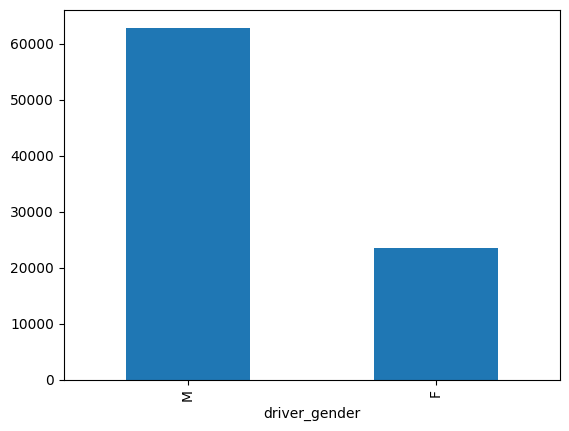

In [30]:
df.driver_gender.value_counts().plot.bar()

In [31]:
# find average, min, max afge for male & female
df.groupby('driver_gender').driver_age.agg(['min','max','mean'])

,min,max,mean
driver_gender,,,
F,15.0,99.0,32.607399
M,15.0,94.0,34.537886


In [34]:
# check drug activity for both male & frmale
drug_data = pd.DataFrame(df.groupby('driver_gender').drugs_related_stop.value_counts())
drug_data

count
driver_gender drugs_related_stop       
F             False               23415
              True                   96
M             False               62176
              True                  719

In [36]:
# Extract tru drug cases for male & female
df.groupby('driver_gender').drugs_related_stop.sum()

driver_gender
F     96
M    719
Name: drugs_related_stop, dtype: int64

In [37]:
# total cases for true and false of drugs relatred stop
df['drugs_related_stop'].value_counts()

drugs_related_stop
False    90926
True       815
Name: count, dtype: int64

In [38]:
# What tipe of action taken by police for eacg date
df.groupby('stop_date').stop_outcome.value_counts()

stop_date   stop_outcome    
2005-01-02  Citation             1
2005-01-18  Citation             1
2005-01-23  Citation             1
2005-02-20  Arrest Driver        1
2005-03-14  Citation             1
                                ..
2015-12-30  N/D                  2
            Arrest Passenger     1
2015-12-31  Citation            16
            Warning              7
            No Action            1
Name: count, Length: 8970, dtype: int64

In [42]:
# how many times ploice has give warning as stop_outcomes
warning_data = df[df['stop_outcome']=='Warning']
#warning_data = len(df[df['stop_outcome']=='Warning'])
warning_data

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_data
99,2005-10-03,2023-04-28 08:37:00,NaN,M,1965.0,40.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,2005-10-03
108,2005-10-03,2023-04-28 17:00:00,NaN,M,1961.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,30+ Min,False,2005-10-03
168,2005-10-06,2023-04-28 06:30:00,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2005-10-06
260,2005-10-09,2023-04-28 16:00:00,NaN,F,1978.0,27.0,Black,Registration Violation,Registration/plates,False,NaN,Warning,False,0-15 Min,False,2005-10-09
281,2005-10-10,2023-04-28 12:05:00,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,2005-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91730,2015-12-31,2023-04-28 15:36:00,NaN,F,1996.0,19.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,2015-12-31
91732,2015-12-31,2023-04-28 19:44:00,NaN,F,1969.0,46.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2015-12-31
91736,2015-12-31,2023-04-28 20:27:00,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2015-12-31
91737,2015-12-31,2023-04-28 20:35:00,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,2015-12-31


In [43]:
# Warnign cases for male & female
warning_data.groupby('driver_gender').stop_outcome.value_counts()

driver_gender  stop_outcome
F              Warning         1514
M              Warning         3779
Name: count, dtype: int64

In [45]:
# How many male & female for each violation
pd.crosstab(df['driver_gender'], df['violation'], margins=True)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
driver_gender,,,,,,,
F,2487,3204,690,1013,635,15482,23511
M,8533,13020,3627,2419,2317,32979,62895
All,11020,16224,4317,3432,2952,48461,86406


<Axes: >

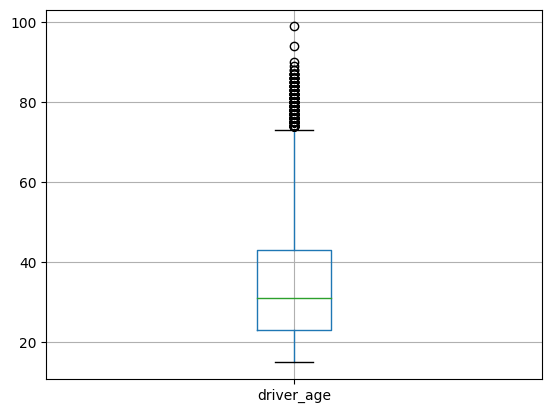

In [46]:
# Data distribution visualization fro driver_age
df.boxplot('driver_age')